In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol_DELL = 'DELL'
tickerSymbol_HP = 'HPQ'

#get data on this ticker
#tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
df = yf.download([tickerSymbol_DELL,tickerSymbol_HP],period='1d', start='2020-1-1', end='2022-10-10',groupy_by='ticker')

#see your data
df

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
                 DELL        HPQ       DELL        HPQ       DELL        HPQ   
Date                                                                           
2020-01-02  25.865959  19.099625  26.502789  20.790001  26.670046  20.830000   
2020-01-03  25.015137  18.860764  25.631020  20.530001  26.345667  20.680000   
2020-01-06  25.267414  18.934258  25.889507  20.610001  25.995945  20.790001   
2020-01-07  24.634245  18.980192  25.240749  20.660000  26.006083  20.780001   
2020-01-08  24.733177  19.228241  25.342119  20.930000  25.362392  20.990000   
...               ...        ...        ...        ...        ...        ...   
2022-10-03  35.536503  25.889999  35.880001  25.889999  36.139999  26.110001   
2022-10-04  37.101376  26.639999  37.459999  26.639999  37.490002  26.860001   
2022-10-05  37.497547  26.780001  37.860001  26.780001  38.119999  26.950001   
2022-10-06  37.121185  26.480000  37.480000  26.480000  38.320000  27.040001   
2022-10-07  34.268753  25.040001  34.599998  25.040001  36.490002  25.850000   

                  Low                  Open              Volume            
                 DELL        HPQ       DELL        HPQ     DELL       HPQ  
Date                                                                       
2020-01-02  26.127724  20.650000  26.386213  20.680000  4278253   7194700  
2020-01-03  25.554993  20.450001  26.051699  20.480000  4447142   5421800  
2020-01-06  25.387733  20.510000  25.387733  20.660000  4983403   9312500  
2020-01-07  25.124176  20.510000  25.869234  20.559999  6135833   6536200  
2020-01-08  24.911303  20.530001  25.088697  20.530001  6934306   7780100  
...               ...        ...        ...        ...      ...       ...  
2022-10-03  34.200001  25.090000  34.520000  25.340000  4119700   8922800  
2022-10-04  36.520000  26.299999  36.580002  26.379999  2670300   8844900  
2022-10-05  36.759998  26.120001  36.950001  26.170000  2512400   7457100  
2022-10-06  37.380001  26.450001  37.910000  26.580000  2757500   8415900  
2022-10-07  34.540001  24.900000  36.049999  25.770000  5613900  10317900  

[698 rows x 12 columns]

In [7]:
close_DELL = df["Close"]["DELL"]
simple_return_DELL = close_DELL.pct_change()
log_return_DELL = np.log(1+simple_return_DELL)

close_HP = df["Close"]["HPQ"]
simple_return_HP = close_HP.pct_change()
log_return_HP = np.log(1+simple_return_HP)


Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

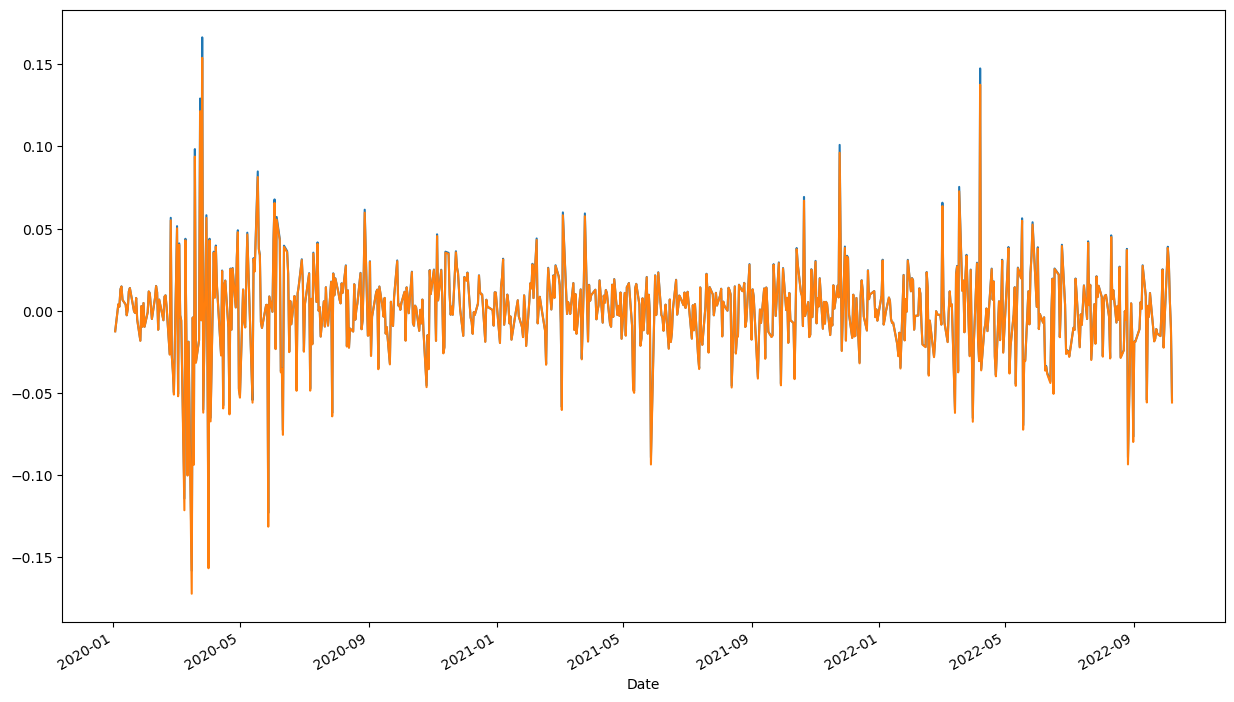

In [8]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#apple["Adj. Close"].plot(grid = False) # Plot the adjusted closing price of AAPL

simple_return_HP.plot()# Plot the lsimple return
log_return_HP.plot() # Plot the logreturn

<AxesSubplot:xlabel='Date'>

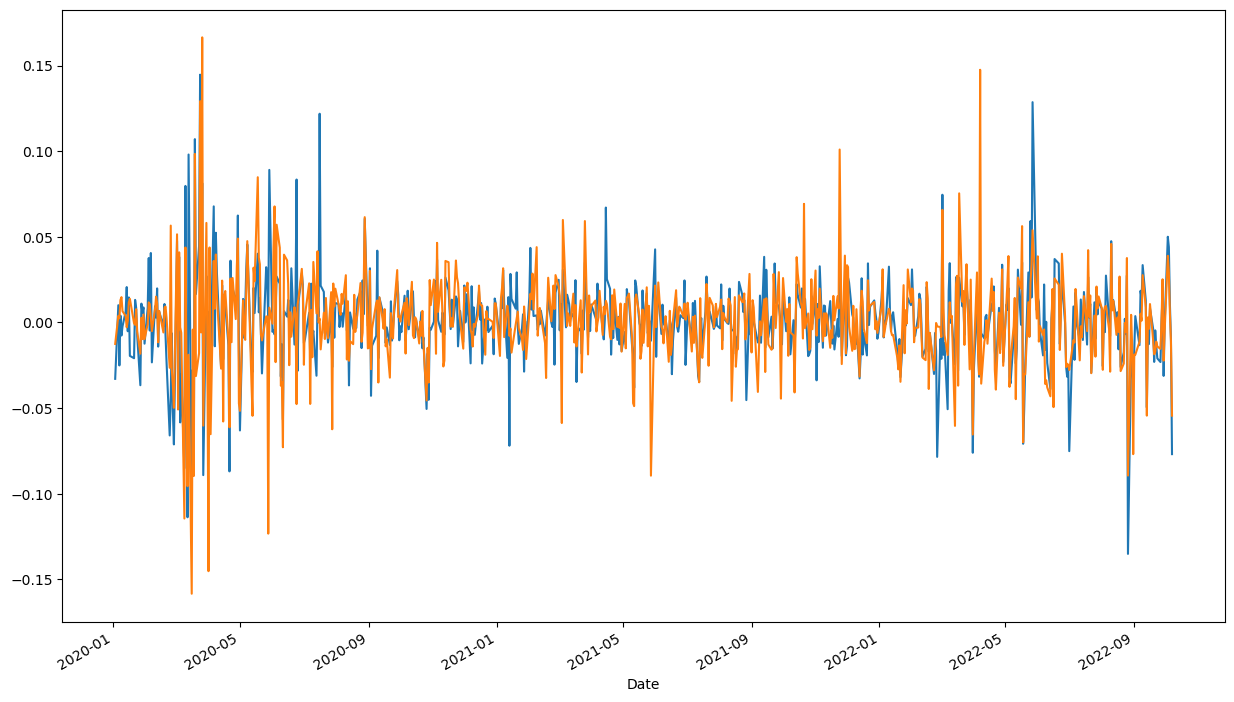

In [10]:
simple_return_DELL.plot()# Plot the lsimple return
simple_return_HP.plot()

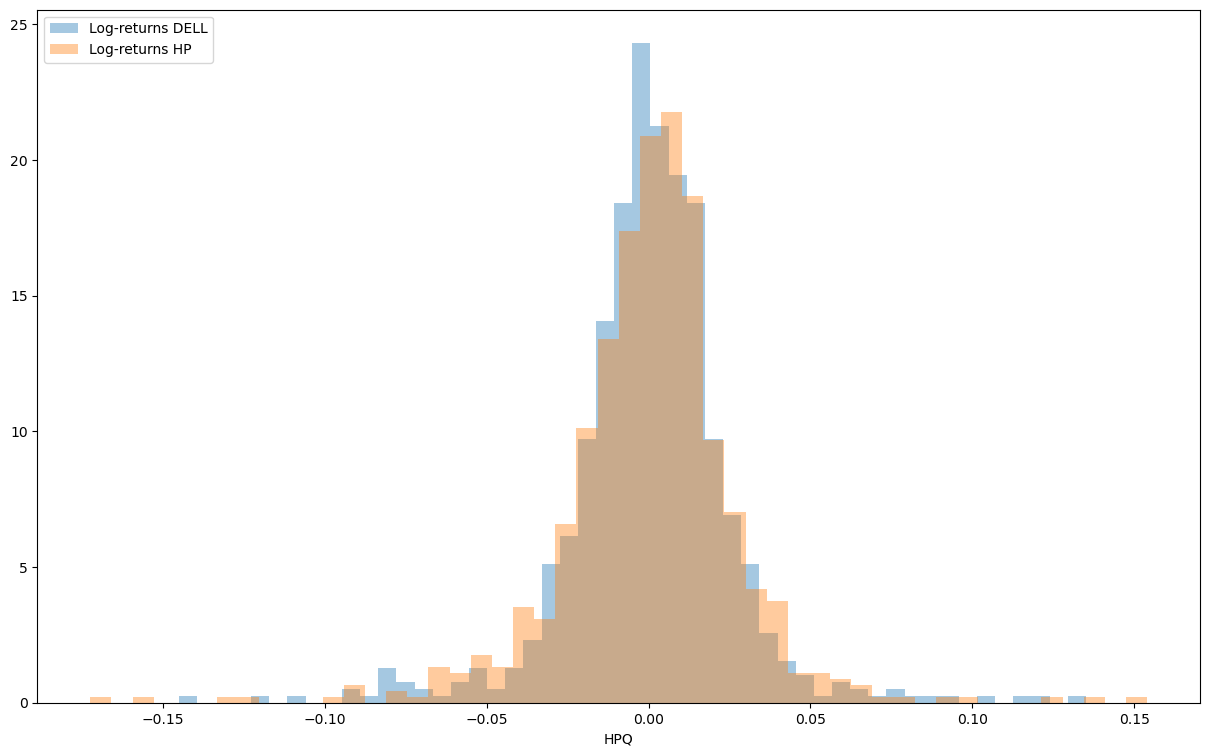

In [12]:
import seaborn as sns

# histogram
sns.distplot(log_return_DELL, kde=False, norm_hist=True,label='Log-returns DELL') 
sns.distplot(log_return_HP, kde=False, norm_hist=True, label='Log-returns HP')  

legend(loc='upper left');

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [13]:
simple_return_DELL.describe()

count    697.000000
mean       0.000720
std        0.025992
min       -0.135073
25%       -0.010702
50%        0.000855
75%        0.013175
max        0.144667
Name: DELL, dtype: float64

In [14]:
simple_return_HP.describe()

count    697.000000
mean       0.000658
std        0.027911
min       -0.158324
25%       -0.011886
50%        0.002465
75%        0.013660
max        0.166450
Name: HPQ, dtype: float64